In [59]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

test_data = pd.read_csv('../test_data_preprocess.csv')
compt_weights = pd.read_csv('../computed_weights/compt_weights_RSF_mean_repeat.csv')
compt_weights.columns
if 'Unnamed: 0' in compt_weights.columns:
    compt_weights.pop('Unnamed: 0')
    
#compt_weights = compt_weights.mul(test_data)
compt_weights = compt_weights * test_data.mean()

In [60]:
median_up = {}
median_down = {}

for (columnName, columnData) in compt_weights.items():
    median_value = np.mean(columnData)
    if median_value > 0:
        median_up[columnName] = median_value
    else:
        median_down[columnName] = median_value

median_up = dict(sorted(median_up.items(), key=lambda item: item[1], reverse=True))
median_down = dict(
    sorted(median_down.items(), key=lambda item: item[1], reverse=True)
)

pal_up = sns.color_palette("Reds_r", n_colors=len(median_up))
pal_down = sns.color_palette("Blues", n_colors=len(median_down))
colors_up = {key: val for key, val in zip(median_up.keys(), pal_up)}
colors_down = {key: val for key, val in zip(median_down.keys(), pal_down)}
custom_pal = {**colors_up, **colors_down}

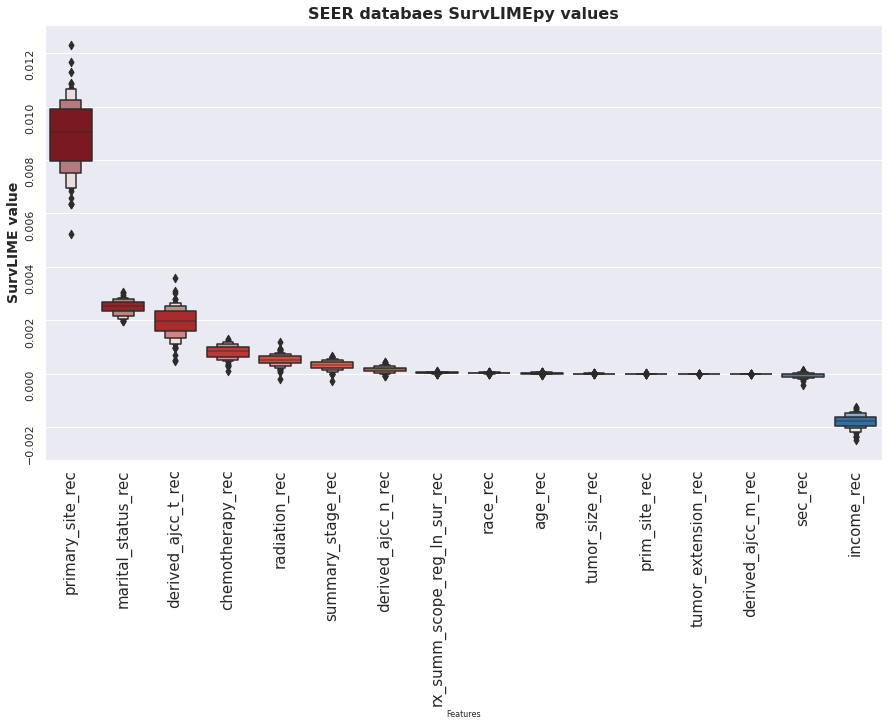

In [61]:

pru = compt_weights.copy()
pru = pru.reindex(pru.mean().sort_values(ascending=False).index, axis=1)

fig, ax= plt.subplots(1,1, figsize=(15,8), sharey=True)
ax.tick_params(labelrotation=90); ax.xaxis.grid(True)

p = sns.boxenplot(x="variable", y="value", data=pd.melt(pru.iloc[:]),
                                    ax=ax, palette=custom_pal) #'GnBu_r'
ax.tick_params(labelrotation=90); #ax.xaxis.grid(True)
p.set_xlabel('Features', fontsize= 8)
p.set_ylabel('SurvLIME value', fontsize= 14, fontweight='bold')
#p.set_ylim([-1, 2])# p.set_ylim([-0.01, 0.20]) OS
p.set_title(f'SEER databaes SurvLIMEpy values', fontsize= 16, fontweight='bold');
ax.tick_params(axis='x', which='major', labelsize=15)

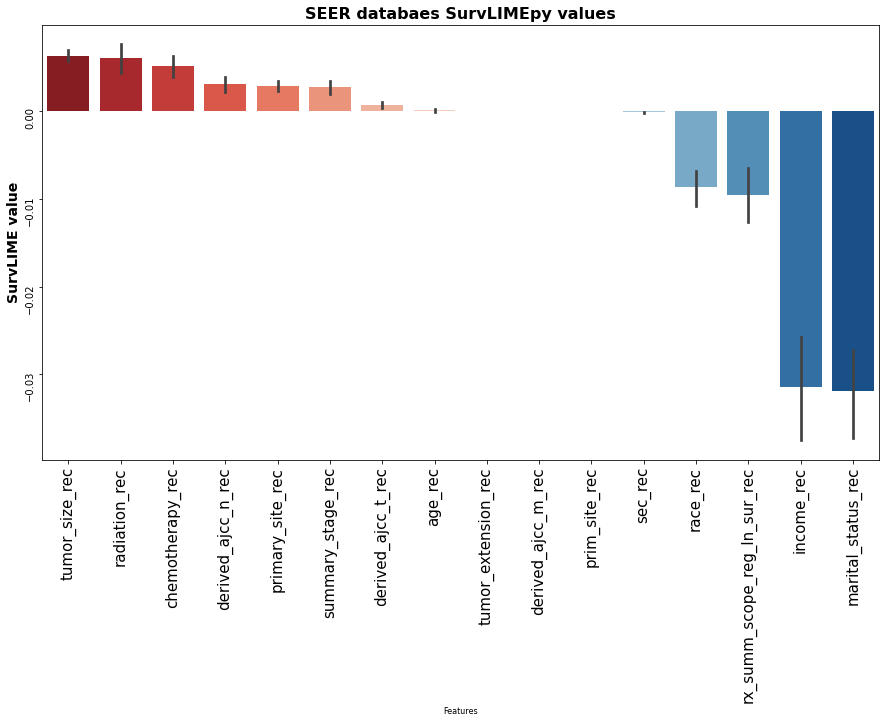

In [46]:
pru = compt_weights.copy()
pru = pru.reindex(pru.mean().sort_values(ascending=False).index, axis=1)

fig, ax= plt.subplots(1,1, figsize=(15,8), sharey=True)
ax.tick_params(labelrotation=90); ax.xaxis.grid(True)

p = sns.barplot(x="variable", y="value", data=pd.melt(pru.iloc[:]),
                                    ax=ax, palette=custom_pal) #'GnBu_r'
ax.tick_params(labelrotation=90); #ax.xaxis.grid(True)
p.set_xlabel('Features', fontsize= 8)
p.set_ylabel('SurvLIME value', fontsize= 14, fontweight='bold')
#p.set_ylim([-1, 2])# p.set_ylim([-0.01, 0.20]) OS
p.set_title(f'SEER databaes SurvLIMEpy values', fontsize= 16, fontweight='bold');
ax.tick_params(axis='x', which='major', labelsize=15)

In [55]:
compt_weights.shape

(100, 16)